# BA222 SPRING 2023 – HW03
Due on 04/08 (Saturday) by 11:59 PM
### by Euijoon David Kim
---

### Instructions
- Submit a single .ipynb (jupyter notebook) file as your solution on Blackboard
- Name the file as BA222_HW03_lastNameFirstName
- Label each cell with the question number
- Type any necessary explanation in your code as a comment

---
---
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

## Part 1. Univariate Regressions

Some problems don't require you to write any Python code. On Jupyter Notebook (or JupyterLab)

you can change the input mode from Code to Markdown to make your answers easier to read and to allow you to type equations.

---
---

### Problem 1.1
1 - Suppose that an analyst, using data from different Dunkin' Donuts locations in Boston,

is estimating the relation between Sales ( , measured in weekly USD)

and distance to the nearest subway station ( , measured in meters)

with a linear regression model.

---

a. Which one of the two variables should be the dependent variable in the
regression model? Explain.

- Dependent Variable = Sales
- Independent Variable = Distance

Based on the independent variable 'Distance,' the dependent variable 'Sales' will change.

---

b. Write a linear equation to represent the regression model.(Hint: don't forget the
error term!)

$$Sales = \beta_0 + \beta_1 Distance + Error$$

---

c. What other factors, besides the distance to the nearest subway station, may
affect the variable Sales?

How are those factors represented in the model?

Taking them into consideration, interpret the intercept and slope coefficients (the betas).

$$Sales = \beta_0 + \beta_1 Subway + \beta_2 School + \beta_3 Company + \beta_4 Residence + \beta_5 Size + Error$$

- Size : Size of the store
- School : Distance to the nearest school
- Company : Distance to the nearest company
- Residence : Distance to the nearest residence

---

d. Assume that the estimated model is equal to:

<img src="screenshot/hw3/11d.png" width="220" height="50"/>

Predict the sales for a location that is ON a subway station?

What about a location that is 100 meters away?

In [2]:
def model(x):
    return 15342 - 50*x

Sales for a location that is on a subway station:

In [3]:
print(model(0))

15342


Sales for a location that is 100 meters away:

In [4]:
print(model(100))

10342


---

e. For some values of the prediction of the model is that sales are negative,

identify the range of values for which the fitted values of sales are negative.

Is this a weakness of the regression model? Explain.

In [5]:
15342 / 50

306.84

306.84 meters and above will output a negative number in sales.

First, in reality, sales can not be below 0.

Second, from the distance equal to 306.84 and above, in reality, the distance to the nearest subway station probably doesn't affect sales as much.

This means that the graph in reality after x reaches 306.84 is not linear to the regression model.

Linear regression performs poorly in non-linear relationships.

---
---

### Problem 1.2

Use the Earnings_and_Height.csv data to answer the questions.

In [6]:
eh = pd.read_csv('data/earningsAndHeight.csv')
eh.head()

,sex,age,mrd,educ,cworker,region,race,earnings,height,weight,occupation
0,0,48,1,13,1,3,1,84054.75000,65,133,1
1,0,41,6,12,1,2,1,14021.39453,65,155,1
2,0,26,1,16,1,1,1,84054.75000,60,108,1
3,0,37,1,16,1,2,1,84054.75000,67,150,1
4,0,35,6,16,1,1,1,28560.38672,68,180,1


---

a. What is the median value of height in the sample?

In [7]:
np.median(eh.height)

67.0

---

b. Estimate the average earnings for workers whose height is at most 67 inches.

Then, estimate the average earnings for workers whose height is greater than 67 inches.

Based on your calculations, what do you think is the relation between height and earnings?

Use the results to estimate how earnings change by each additional inch?

In [8]:
np.mean(eh.loc[eh.height <= 67].earnings)

44488.43593672602

In [9]:
np.mean(eh.loc[eh.height > 67].earnings)

49987.87583845139

Based on the calculation, it seems like the average earnings increase as the average height increases.

In [10]:
def slopeCal(x0, x1, y0, y1):
    deltaX = x1 - x0
    deltaY = y1 - y0
    slope = deltaY / deltaX
    return(slope)

x0 = np.mean(eh.loc[eh.height <= 67].height)
x1 = np.mean(eh.loc[eh.height > 67].height)
y0 = np.mean(eh.loc[eh.height <= 67].earnings)
y1 = np.mean(eh.loc[eh.height > 67].earnings)

slopeCal(x0, x1, y0, y1)

826.0584102823909

Earnings increases by 826.06 for each additional inch on the height.

---

c. Construct a scatterplot of annual earnings (Earnings) on height (Height).

Notice that the points on the plot fall along horizontal lines. (There are only 23 distinct values of Earnings). Why?

Is there an alternative way of displaying the relation between the two variables that is more appropriate to determine if the two variables are related?

If yes, produce the appropriate type of graph. (Hint: Carefully read the data description on Blackboard.)

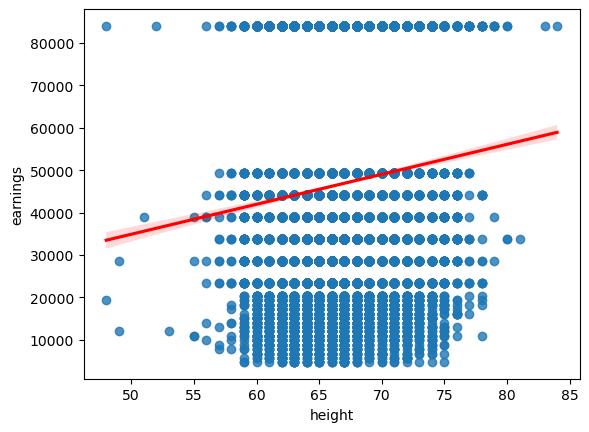

In [11]:
sns.regplot(y= eh.earnings, x= eh.height, line_kws = {'color':'red'})
plt.show()

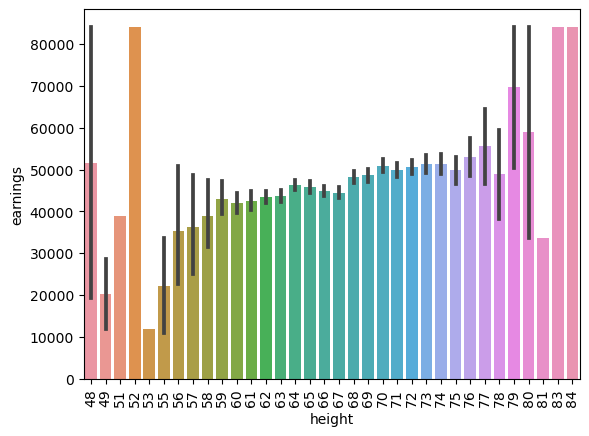

In [12]:
sns.barplot(y=eh.earnings, x=eh.height)
plt.xticks(rotation=90)
plt.show()

---

d. Run a regression of Earnings on Height . What is the estimated slope?

Interpret the value of the slope and compare it to your answer in part b.

In [13]:
model = smf.ols('earnings ~ height', data = eh)
results = model.fit()
results.params

Intercept   -512.733590
height       707.671558
dtype: float64

The average earnings increase about $707 for every additional inch on the height.

It is smaller than the value found in part b.

However, the value in part d is more accurate since it uses average slope of all data instead of the average slope of two average points.

---

e. Use the estimated regression in part d to predict the earnings for a worker that is 65 inches tall.

In [14]:
results.params['height'] * 65 + results.params['Intercept']

45485.917707870576

---

f. What problems you may encounter if you try to use the model to predict the earnings of extremely tall/short individuals? Explain.

Extremely tall or short individuals will most likely have a wrong earnings prediction because in reality, the effect of the height in earnings will flatten out (non-linear) for individuals with extremely tall or short heights.

---

g. Estimate the model only using data for females, and then using data only for males.

Do you observe any difference in the estimated coefficients?

Why that may be the case?

In [15]:
F = eh.loc[eh.sex==0]
modelF = smf.ols('earnings ~ height', data = F)
results = modelF.fit()
results.params

Intercept    12650.857732
height         511.222170
dtype: float64

In [16]:
M = eh.loc[eh.sex==1]
modelM = smf.ols('earnings ~ height', data = M)
results = modelM.fit()
results.params

Intercept   -43130.342344
height        1306.859906
dtype: float64

The beta coefficient (slope) for height is higher for Males. This might be influenced by the higher average earnings of men compared to that of women.

---
---

### Problem 1.3

Use the HousePrices.csv database to answer the following questions:

In [17]:
hp = pd.read_csv('data/houseprices.csv')
hp.head()

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


---

a. Represent graphically the relation between price and lot size.

Describe the statistical relation between the variables.

If necessary, compute the correlation coefficient.

<AxesSubplot:xlabel='price', ylabel='lotsize'>

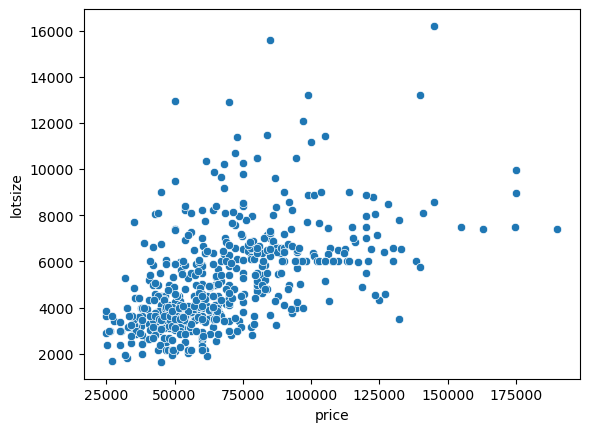

In [18]:
sns.scatterplot(x=hp.price, y=hp.lotsize)

In [19]:
hp.corr(numeric_only = True)

,price,lotsize,bedrooms,bathrooms,stories,garage
price,1.000000,0.535796,0.366447,0.516719,0.421190,0.383302
lotsize,0.535796,1.000000,0.151851,0.193833,0.083675,0.352872
bedrooms,0.366447,0.151851,1.000000,0.373769,0.407974,0.139117
bathrooms,0.516719,0.193833,0.373769,1.000000,0.324066,0.178178
stories,0.421190,0.083675,0.407974,0.324066,1.000000,0.043412
garage,0.383302,0.352872,0.139117,0.178178,0.043412,1.000000


The correlation coefficient between the price and lotsize is 0.5358, which is a fairly strong positive relationship.

---

b. Estimate a univariate regression model using price as the dependent variable and lot size as the independent variable.

Display the results in a table.

In [20]:
model = smf.ols('price ~ lotsize', data = hp)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     219.1
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           6.77e-42
Time:                        23:45:52   Log-Likelihood:                -6247.0
No. Observations:                 546   AIC:                         1.250e+04
Df Residuals:                     544   BIC:                         1.251e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.414e+04   2491.064     13.703      0.000    2.92e+04     3.9e+04
lotsize        6.5988      0.446     14.801      0.000       5.723       7.475
==============================================================================
Omnibus:                       92.458   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.169
Skew:                           0.951   Prob(JB):                     1.68e-40
Kurtosis:                       5.105   Cond. No.                     1.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---

c. Interpret the intercept, slope, R-Squared and the statistical significance of the beta coefficients.

In [21]:
results.params

Intercept    34136.191565
lotsize          6.598768
dtype: float64

When the average lotsize is 0 (No lot), the average price of the houses is 34136.19.

The average price of the houses increases by 6.5988 for each one (unit) increase in average lotsize.

In [22]:
results.rsquared

0.28707700259705604

The lotsize is an acceptable (0.29 is not high) variable to explain the variation of the price => lotsize does affect the price.

In [23]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     219.1
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           6.77e-42
Time:                        23:45:53   Log-Likelihood:                -6247.0
No. Observations:                 546   AIC:                         1.250e+04
Df Residuals:                     544   BIC:                         1.251e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.414e+04   2491.064     13.703      0.000    2.92e+04     3.9e+04
lotsize        6.5988      0.446     14.801      0.000       5.723       7.475
==============================================================================
Omnibus:                       92.458   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.169
Skew:                           0.951   Prob(JB):                     1.68e-40
Kurtosis:                       5.105   Cond. No.                     1.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Hypothesis Test

Hypothesis Value : lotsize = 0

Result: We reject the hypothesis that the slope coefficient is equal to zero because :

- Absolute value of T-STAT is not less than 2.
- P-value is not greater than 0.05.
- 0 is not inside the 95% confidence interval

---

d. What is the average house price for a house with lot size of 3,600 SQF versus a house with a lot size of 6,360 SQF?

In [24]:
def modelFunc(x):
    return results.params['Intercept'] + results.params['lotsize'] * x

In [25]:
modelFunc(3600)

57891.754886271214

In [26]:
modelFunc(6360)

76104.35343264428

---

e. Are there other factors that may be omitted from the regression but are related to price? Explain.

The following factors all have a moderate positive correlation with price. These factors will help improve the predictions provided by the regression model.
- Bedrooms
- Bathrooms
- Stories
- Garage

---

f. Represent graphically the regression line of your estimation for part (b).

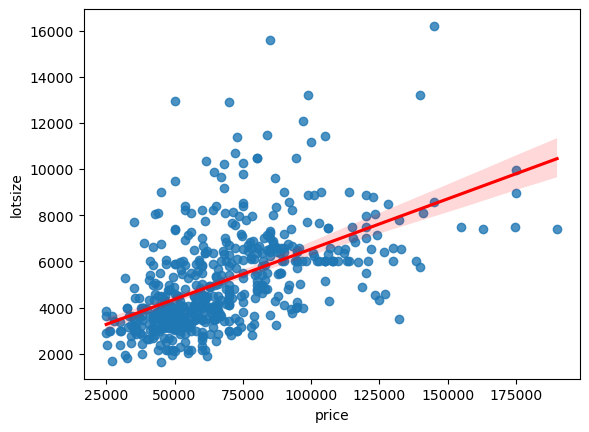

In [27]:
sns.regplot(x= hp.price, y= hp.lotsize, line_kws = {'color':'red'})
plt.show()

---
---
---

## Part 2. Multivariate Regressions
Use the HousePrices.csv database to answer the following questions:

In [28]:
hp.head()

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


---
---

a. Estimate the following multivariate regression models.

<img src="screenshot/hw3/part2a.png" width="400" height="150"/>

In [29]:
model1 = smf.ols('price ~ lotsize + garage + aircon + bathrooms', data = hp)
results1 = model1.fit()
results1.rsquared_adj

0.5608135481340835

In [30]:
model2 = smf.ols('price ~ lotsize + bedrooms + bathrooms + garage', data = hp)
results2 = model2.fit()
results2.rsquared_adj

0.5053422851022935

In [31]:
model3 = smf.ols('lotsize ~ price + bedrooms + bathrooms + garage', data = hp)
results3 = model3.fit()
results3.rsquared_adj

0.3169294692390615

In [32]:
model4 = smf.ols('lotsize ~ price + garage + aircon + bathrooms', data = hp)
results4 = model4.fit()
results4.rsquared_adj

0.3169154155529793

---

b. Out of the four models estimated in part (a). Which one is the best model we can
use for predicting the price of a house?

The first model is the best. Highest adjusted r squared value.

Dependent variable: price;

Independent variable: lotsize, garage, aircon, bathrooms;

---

c. Estimate the beta coefficients of each regression model from part (a) and
determine if they are statistically different than zero or not.

In [33]:
model1 = smf.ols('price ~ lotsize + garage + aircon + bathrooms', data = hp)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     175.0
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           4.54e-96
Time:                        23:45:53   Log-Likelihood:                -6112.7
No. Observations:                 546   AIC:                         1.224e+04
Df Residuals:                     541   BIC:                         1.226e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.236e+04   2551.472      4.846      0.000    7352.062    1.74e+04
aircon[T.yes]   1.63e+04   1692.126      9.632      0.000     1.3e+04    1.96e+04
lotsize           4.2873      0.382     11.209      0.000       3.536       5.039
garage         4651.5741    949.676      4.898      0.000    2786.069    6517.079
bathrooms      1.967e+04   1565.171     12.569      0.000    1.66e+04    2.27e+04
==============================================================================
Omnibus:                       72.925   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.091
Skew:                           0.772   Prob(JB):                     8.47e-32
Kurtosis:                       4.976   Cond. No.                     2.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Result: We reject the hypothesis that the slope coefficient is equal to zero because :

For all of them :

- Absolute value of T-STAT is not less than 2.
- P-value is not greater than 0.05.
- 0 is not inside the 95% confidence interval

In [34]:
model2 = smf.ols('price ~ lotsize + bedrooms + bathrooms + garage', data = hp)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     140.2
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           3.86e-82
Time:                        23:45:53   Log-Likelihood:                -6145.2
No. Observations:                 546   AIC:                         1.230e+04
Df Residuals:                     541   BIC:                         1.232e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -547.2646   3717.343     -0.147      0.883   -7849.459    6754.930
lotsize        4.7588      0.401     11.853      0.000       3.970       5.547
bedrooms    5508.2615   1182.443      4.658      0.000    3185.520    7831.003
bathrooms   1.893e+04   1754.481     10.791      0.000    1.55e+04    2.24e+04
garage      5033.3960   1006.903      4.999      0.000    3055.478    7011.314
==============================================================================
Omnibus:                       48.925   Durbin-Watson:                   1.421
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.914
Skew:                           0.584   Prob(JB):                     3.64e-19
Kurtosis:                       4.539   Cond. No.                     2.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Result: We reject the hypothesis that the slope coefficient is equal to zero because :

For all of them :

- Absolute value of T-STAT is not less than 2.
- P-value is not greater than 0.05.
- 0 is not inside the 95% confidence interval

In [35]:
model3 = smf.ols('lotsize ~ price + bedrooms + bathrooms + garage', data = hp)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lotsize   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     64.22
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           2.01e-44
Time:                        23:45:53   Log-Likelihood:                -4862.3
No. Observations:                 546   AIC:                             9735.
Df Residuals:                     541   BIC:                             9756.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2721.4184    334.844      8.127      0.000    2063.664    3379.172
price          0.0433      0.004     11.853      0.000       0.036       0.051
bedrooms     -86.9387    115.003     -0.756      0.450    -312.845     138.968
bathrooms   -436.9507    183.584     -2.380      0.018    -797.576     -76.325
garage       429.1931     96.519      4.447      0.000     239.594     618.792
==============================================================================
Omnibus:                      173.737   Durbin-Watson:                   1.428
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              565.382
Skew:                           1.489   Prob(JB):                    1.69e-123
Kurtosis:                       6.998   Cond. No.                     3.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Result: We can not reject the hypothesis that the slope coefficient is equal to zero because :

For the variable 'bedrooms' :

- Absolute value of T-STAT is less than 2.
- P-value is greater than 0.05.
- 0 is inside the 95% confidence interval

In [36]:
model4 = smf.ols('lotsize ~ price + garage + aircon + bathrooms', data = hp)
results4 = model4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lotsize   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     64.21
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           2.02e-44
Time:                        23:45:53   Log-Likelihood:                -4862.4
No. Observations:                 546   AIC:                             9735.
Df Residuals:                     541   BIC:                             9756.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2517.9907    240.691     10.461      0.000    2045.186    2990.795
aircon[T.yes]  -138.7571    185.364     -0.749      0.454    -502.878     225.364
price             0.0440      0.004     11.209      0.000       0.036       0.052
garage          427.2449     96.544      4.425      0.000     237.598     616.892
bathrooms      -477.8149    178.978     -2.670      0.008    -829.391    -126.239
==============================================================================
Omnibus:                      168.714   Durbin-Watson:                   1.421
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              536.670
Skew:                           1.453   Prob(JB):                    2.91e-117
Kurtosis:                       6.892   Cond. No.                     2.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Result: We can not reject the hypothesis that the slope coefficient is equal to zero because :

For the variable 'aircon' :

- Absolute value of T-STAT is less than 2.
- P-value is greater than 0.05.
- 0 is inside the 95% confidence interval

---

d. Estimate the price of the following houses. 

You will need to first estimate a regression model with price as dependent variable and the variables on the table as independent variables:

<img src="screenshot/hw3/part2d.png" width="400" height="150"/>

In [37]:
import statsmodels.api as sm

y = hp['price']
x = hp[['lotsize' , 'garage', 'aircon', 'bathrooms' , 'bedrooms' , 'driveway' , 'prefer' , 'recreation' , 'fullbase']]
x = sm.add_constant(x)

In [38]:
x['aircon'] = x.aircon.map(lambda x : 0 if x=='no' else 1)
x['driveway'] = x.driveway.map(lambda x : 0 if x=='no' else 1)
x['prefer'] = x.prefer.map(lambda x : 0 if x=='no' else 1)
x['recreation'] = x.recreation.map(lambda x : 0 if x=='no' else 1)
x['fullbase'] = x.fullbase.map(lambda x : 0 if x=='no' else 1)

In [39]:
model5 = sm.OLS(y, x).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     102.0
Date:                Sat, 08 Apr 2023   Prob (F-statistic):          3.70e-110
Time:                        23:45:54   Log-Likelihood:                -6066.8
No. Observations:                 546   AIC:                         1.215e+04
Df Residuals:                     536   BIC:                         1.220e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3436.9887   3612.051     -0.952      0.342   -1.05e+04    3658.523
lotsize        3.3487      0.370      9.045      0.000       2.621       4.076
garage      4071.9537    885.651      4.598      0.000    2332.182    5811.725
aircon      1.442e+04   1579.094      9.132      0.000    1.13e+04    1.75e+04
bathrooms   1.692e+04   1541.634     10.977      0.000    1.39e+04       2e+04
bedrooms    4597.0486   1037.494      4.431      0.000    2558.996    6635.101
driveway    8800.5312   2144.239      4.104      0.000    4588.389     1.3e+04
prefer      9363.3142   1765.574      5.303      0.000    5895.020    1.28e+04
recreation  5336.8980   2010.065      2.655      0.008    1388.328    9285.468
fullbase    2378.2796   1616.814      1.471      0.142    -797.789    5554.348
==============================================================================
Omnibus:                       82.493   Durbin-Watson:                   1.558
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.158
Skew:                           0.824   Prob(JB):                     1.25e-39
Kurtosis:                       5.271   Cond. No.                     3.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
houses = pd.DataFrame({'lotsize': [6360,4600,3600,7500],
                       'garage': [1,0,1,0],
                       'aircon': [1,1,1,0],
                       'bathrooms': [2,3,2,2],
                       'bedrooms': [3,2,3,4],
                       'driveway': [1,1,0,1],
                       'prefer': [0,0,1,0],
                       'recreation': [0,1,1,0],
                       'fullbase': [0,0,0,1]})

houses

,lotsize,garage,aircon,bathrooms,bedrooms,driveway,prefer,recreation,fullbase
0,6360,1,1,2,3,1,0,0,0
1,4600,0,1,3,2,1,0,1,0
2,3600,1,1,2,3,0,1,1,0
3,7500,0,0,2,4,1,0,0,1


In [41]:
houses = sm.add_constant(houses)
houses

,const,lotsize,garage,aircon,bathrooms,bedrooms,driveway,prefer,recreation,fullbase
0,1.0,6360,1,1,2,3,1,0,0,0
1,1.0,4600,0,1,3,2,1,0,1,0
2,1.0,3600,1,1,2,3,0,1,1,0
3,1.0,7500,0,0,2,4,1,0,0,1


In [42]:
model5.predict(houses)

0     92790.833238
1    100487.882126
2     89448.159673
3     85090.767119
dtype: float64

---

e. Estimate the price of all the houses in the database using the previous model.

Then make a histogram of the residuals and describe its distribution.

In [43]:
model5.predict()

array([ 62117.52314235,  44875.18482216,  46324.47499783,  63683.13114502,
        52778.06762463,  72144.13459928,  76515.40733588,  50008.02206678,
        59866.35435021,  95247.86715185, 106125.91069983,  32725.97442906,
        41770.27134895,  36921.18151067,  43535.71316073,  56566.94621935,
        42399.58042186,  58087.69696655,  38436.36270765,  64737.73182573,
        78309.01273695,  75078.21644934,  63893.16830957,  44654.17199803,
        48089.91680961,  41526.50566857,  44205.44899144,  64889.13135631,
        51743.95791647,  65567.50788637,  36778.59364519,  74959.78464617,
        44875.18482216,  46549.52439896,  52778.06762463,  69114.36663967,
        47360.62219441,  67811.12291927,  98245.10349741,  52529.38440086,
        50996.59985738,  68012.76110877,  60284.39030722, 115992.84533792,
        38177.82651499,  36888.41215943,  32859.92159521,  37624.40413293,
        48483.48273018,  47295.59195237,  79942.44192138,  47981.89829743,
        87117.58320965,  

In [44]:
model5.resid

0     -20117.523142
1      -6375.184822
2       3175.525002
3      -3183.131145
4       8221.932375
           ...     
541     2668.161922
542     6486.644924
543     6077.793271
544     8077.793271
545    30337.519717
Length: 546, dtype: float64

<AxesSubplot:ylabel='Count'>

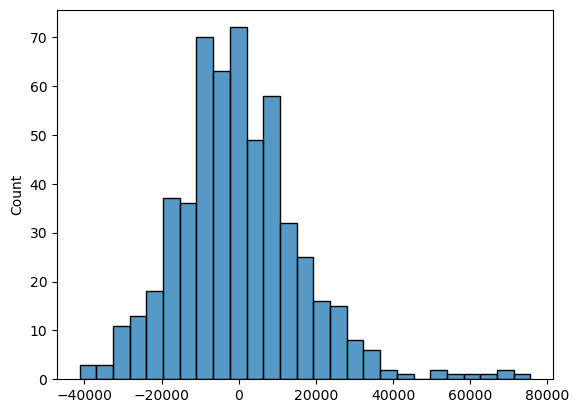

In [45]:
sns.histplot(data=model5.resid)

---
---
---

### Part 3. Outliers
Use the 'growth.csv' data to answer the following questions:

In [46]:
gr = pd.read_csv('data/growth.csv')
gr.head()

,country_name,growth,oil,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
0,India,1.915168,0,765.999817,0.140502,1.45,0.133333,0.866667
1,Argentina,0.617645,0,4462.001465,0.156623,4.99,0.933333,1.933333
2,Japan,4.304759,0,2953.999512,0.157703,6.71,0.000000,0.200000
3,Brazil,2.930097,0,1783.999878,0.160405,2.89,0.100000,0.100000
4,United States,1.712265,0,9895.003906,0.160815,8.66,0.000000,0.433333


---

a. Construct a scatterplot of average annual growth rate on the average trade share.

Describe the relation between the two variables.

<AxesSubplot:xlabel='growth', ylabel='tradeshare'>

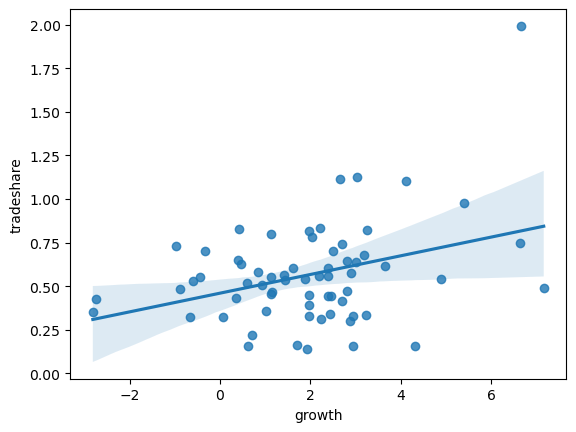

In [47]:
sns.regplot(x=gr.growth, y=gr.tradeshare)

In [48]:
gr[['growth','tradeshare']].corr()

,growth,tradeshare
growth,1.000000,0.351682
tradeshare,0.351682,1.000000


Weak positive correlation

---

b. One country, Malta, has a trade share much larger than other counties.

Find Malta on the scatterplot. Does Malta look like an outlier? Explain.

In [49]:
gr.loc[gr.country_name == 'Malta']

,country_name,growth,oil,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
64,Malta,6.652838,0,1374.0,1.992616,5.64,0.0,0.0


Malta is plotted on the top right corner. Based on the scatterplot, it does look like an outlier.

---

c. Using all the observations, run a regression of Growth on Trade Share.

What is the estimated intercept and slope? interpret the beta coefficients.

In [50]:
model = smf.ols('growth ~ tradeshare', data = gr)
results = model.fit()
results.params

Intercept     0.640265
tradeshare    2.306434
dtype: float64

When the average tradeshare is equal to 0, the average growth is 0.640265. 

The average growth increases by 2.3064 for every (1.0) increase in tradeshare.

---

d. Use the estimated regression to answer to predict the growth rate for a country with a trade share of 0.5 with a trade share equal to 1.0.

In [51]:
def modelFunc(x):
    return results.params['Intercept'] + results.params['tradeshare'] * x

In [52]:
modelFunc(0.5)

1.7934821441905489

In [53]:
modelFunc(1.0)

2.9466990140026845

---

e. Estimate the same regression from part c excluding the data from Malta.

Compare the two regressions and re-do question.

In [54]:
gr_Malta = gr.loc[gr.country_name != 'Malta']

model_Malta = smf.ols('growth ~ tradeshare', data = gr_Malta)
results_Malta = model_Malta.fit()
results_Malta.params

Intercept     0.957411
tradeshare    1.680905
dtype: float64

When the average tradeshare is equal to 0, the average growth is 0.957411. 

The average growth increases by 1.6809 for every (1.0) increase in tradeshare.

In [55]:
def modelFunc(x):
    return results_Malta.params['Intercept'] + results_Malta.params['tradeshare'] * x

In [56]:
modelFunc(0.5)

1.797863000877297

In [57]:
modelFunc(1.0)

2.6383153328420885

---

f. Where is Malta located? Why is the Malta trade share so large?

Should Malta be included or excluded from the analysis?

Malta is an island country in the Mediterranean Sea.

According to the internet sources, Malta is a freight transport site, where the imports are transported to other coutries immediately.

Malta should be excluded from the analysis because the trade share has a different meaning for Malta than that of other countries.

---
---
---

### Part 4. Omitted Variable Bias

---

a. Do you think the three models discussed in Part 1 suffer from omitted variable bias? Explain.

Yes.

First, for the dunkin model, the sales should not be compared with only the distance to the nearest subway station. Instead, the distance to the nearest subway station should be compared between the same sized dunkin stores.

Second, for the height and earnings, the height effect on the earnings should be compared between the people with same occupation and age.

Third, for the housing price, the lotsize effect on the price should be compared between the same sized houses.

These are just examples of confounding variables that corrects the OVB partially, but there can be many more. However, the univariate regression models definitely suffered from OVB.

---

b. Say you want to build houses with the intention of selling them.

You need to decide how many bathrooms your houses should have.

The marginal cost of building an additional bathroom is given by the following progression:

(1) $5,000, (2) $10,000, (3) $17,000 and (4) $30,000.

That is, if you plan to build a house with a single bathroom;

that will add $5,000 to the total construction cost;

but, if you build two bathrooms the total cost in bathrooms would be $15,000 (5000 + 10000), and so on.

Estimate a regression model for which the coefficient for the bathroom coefficient is the least biases as possible given the available data.

Use that model to decide how many bathrooms to build.

In [58]:
model_house = smf.ols('price ~ bathrooms', data = hp).fit()
m = model_house.params
m

Intercept    32794.044352
bathrooms    27476.985447
dtype: float64

In [59]:
df = pd.DataFrame({'num': [0,1,2,3,4], 'cost': [0, -5000, -15000, -32000, -62000], 'price': [m['Intercept'],m['Intercept']+m['bathrooms'], m['Intercept']+m['bathrooms']*2, m['Intercept']+m['bathrooms']*3, m['Intercept']+m['bathrooms']*4]})
df

,num,cost,price
0,0,0,32794.044352
1,1,-5000,60271.029799
2,2,-15000,87748.015246
3,3,-32000,115225.000693
4,4,-62000,142701.986140


In [60]:
df['plus'] = df['price'] + df['cost']
df

,num,cost,price,plus
0,0,0,32794.044352,32794.044352
1,1,-5000,60271.029799,55271.029799
2,2,-15000,87748.015246,72748.015246
3,3,-32000,115225.000693,83225.000693
4,4,-62000,142701.986140,80701.986140


Building 3 bathrooms is the best. However, OVB will be a big problem in the house price data model because the size of the house would be an important confounding variable.

In [61]:
model_df = smf.ols('cost ~ num', data = df)
model_df = model_df.fit()
model_df.summary()

/Users/davidekim/tensorflow/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     28.66
Date:                Sat, 08 Apr 2023   Prob (F-statistic):             0.0128
Time:                        23:45:55   Log-Likelihood:                -51.298
No. Observations:                   5   AIC:                             106.6
Df Residuals:                       3   BIC:                             105.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7400.0000   6909.414      1.071      0.363   -1.46e+04    2.94e+04
num         -1.51e+04   2820.756     -5.353      0.013   -2.41e+04   -6123.094
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.482
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.678
Skew:                          -0.264   Prob(JB):                        0.712
Kurtosis:                       1.275   Cond. No.                         4.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

c. Discuss the pros and cons of using linear regression models to answer policy questions like the one discussed in part b

Pros: Estimates and approximates the causal relation between x and y while controlling additional factors.

Cons: Impossible to control every factors therefore suffers from the omitted variable bias.

---

#### BA222 SPRING 2023 – HW03
#### by Euijoon David Kim
---